## WVAP策略
sum((close*volume), s)/sum(volume), s)

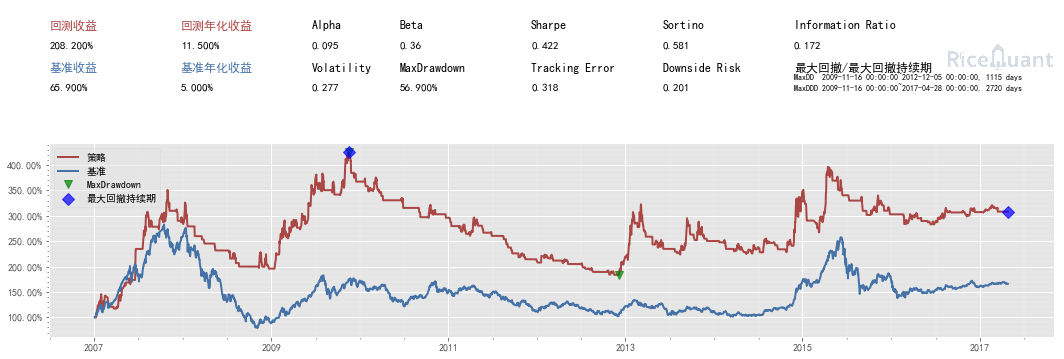

{'sys_analyser': {'benchmark_portfolio':               cash  market_value  static_unit_net_value  total_value  \
  date                                                                   
  2007-01-04  779.68      99220.32                  1.000    100000.00   
  2007-01-05  779.68      99498.24                  1.000    100277.92   
  2007-01-08  779.68     102314.88                  1.003    103094.56   
  2007-01-09  779.68     105604.32                  1.031    106384.00   
  2007-01-10  779.68     108286.56                  1.064    109066.24   
  2007-01-11  779.68     107118.24                  1.091    107897.92   
  2007-01-12  779.68     104340.00                  1.079    105119.68   
  2007-01-15  779.68     109792.32                  1.051    110572.00   
  2007-01-16  779.68     112985.76                  1.106    113765.44   
  2007-01-17  779.68     110828.64                  1.138    111608.32   
  2007-01-18  779.68     111220.32                  1.116    112000.00   

In [5]:
#coding=utf-8
# run_code_demo
from rqalpha import run_code

code = """
import rqalpha
from rqalpha.api import *
import talib

def init(context):
    context.s1 = "000001.XSHE"
    context.PERIOD = 20
    context.stoploss = 0.98
    context.takeprofit = 2

def stop_loss(context,bar_dict):
    for stock in context.portfolio.positions:
        if bar_dict[stock].last<context.portfolio.positions[stock].avg_price*context.stoploss:
            order_target_percent(stock,0)
        elif bar_dict[stock].last>context.portfolio.positions[stock].avg_price*context.takeprofit:
            order_target_percent(stock,0)

def handle_bar(context, bar_dict):
    stop_loss(context, bar_dict)
    prices = history_bars(context.s1, context.PERIOD+1, '1d', 'close')
    volumes = history_bars(context.s1, context.PERIOD+1, '1d', 'volume')
    WVAP_2 = (prices[:-1] * volumes[:-1]).sum()/volumes[:-1].sum()
    WVAP_1 = (prices[1:] * volumes[1:]).sum()/volumes[1:].sum()

    cur_position = context.portfolio.positions[context.s1].quantity
    shares = context.portfolio.cash/bar_dict[context.s1].close

    if prices[-1]<WVAP_1 and cur_position>0:
        order_target_value(context.s1, 0)

    if prices[-2]<WVAP_2 and prices[-1]>WVAP_1:
        order_shares(context.s1, shares)
"""

config = {
  "base": {
    "start_date": "2007-01-01",
    "end_date": "2017-05-01",
    "securities": ['stock'],
    "stock_starting_cash": 100000,
    "benchmark": "000300.XSHG"
#     "strategy_file_path": os.path.abspath(__file__)
  },
  "extra": {
    "log_level": "verbose",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True
    }
  }
}

# 您可以指定您要传递的参数
run_code(code, config)